<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter3/gibbsamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
!python --version

Python 3.7.11


# Example 3.5
## Import modules

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
print(np.__version__)

1.19.5


## Set random seed

In [215]:
np.random.seed(200)

## Original Program

0.37984
0.6128852884000001


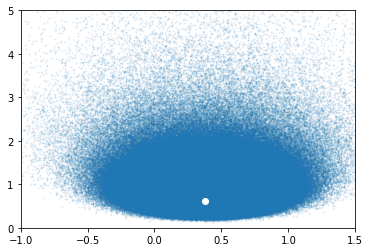

In [216]:
x = np.array([[-0.9472, 0.5401, -0.2166, 1.1890, 1.3170,
               -0.4056, -0.4449, 1.3284, 0.8338, 0.6044]])
n=x.size
sample_mean = np.mean(x)
sample_var = np.var(x)
sig2 = np.var(x)
mu=sample_mean

print(mu)
print(sig2)

N=10**6
gibbs_sample = np.array(np.zeros((N, 2)))
for k in range(N):
    mu=sample_mean + np.sqrt(sig2/n)*np.random.randn()
    V=np.sum((x-mu)**2)/2
    sig2 = 1/np.random.gamma(n/2, 1/V)
    gibbs_sample[k,:]= np.array([mu, sig2])
plt.scatter(gibbs_sample[:,0], gibbs_sample[:,1],alpha =0.1,s =1)
plt.plot(np.mean(x), np.var(x),'wo')
plt.ylim([0,5]), plt.xlim([-1,1.5])
plt.show()

## Estimate credible interval and check if the shape is still like normal/gamma distribution

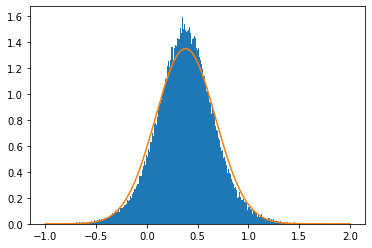

0.37973700620025436
0.29560735586028264
2.5%:  -0.20850000000000002
97.5%:  0.9675


'\nn_sum = 0\nfor i in range(299):\n  n_sum += hist[i]\n  print("mu= ", -1 + (i+0.5)*binsize, "N = ", n_sum/N*100 , "%")\n'

In [217]:
binsize = 0.001
xstart = -1
xend = 2
_, binss, _ = plt.hist(gibbs_sample[:,0], density=1, bins = np.arange(xstart,xend,binsize))
mu, sigma = norm.fit(gibbs_sample[:,0])
best_fit_line = norm.pdf(binss, mu, sigma)
plt.plot(binss, best_fit_line)
plt.show()

print(mu)
print(sigma)

hist, xedges= np.histogram(gibbs_sample[:,0], bins=np.arange(xstart,xend,binsize))

N005 = 0.025 * N
ii = 0
n_sum = 0
while n_sum < N005 :
  n_sum += hist[ii]
  ii = ii + 1

print("2.5%: ", xstart + (ii+0.5)*binsize)

ii = round((xend-xstart)/binsize-2)
n_sum = 0
while n_sum < N005 :
  n_sum += hist[ii]
  ii = ii - 1

print("97.5%: ", xstart + (ii+0.5)*binsize)
'''
n_sum = 0
for i in range(299):
  n_sum += hist[i]
  print("mu= ", -1 + (i+0.5)*binsize, "N = ", n_sum/N*100 , "%")
'''


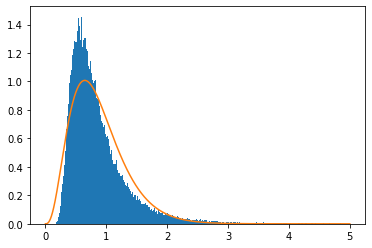

3.8272605297478095
0
0.22868430752570093
2.5%:  0.3235
97.5%:  2.2375000000000003


In [218]:
binsize = 0.001
xstart = 0
xend = 5
_, bins, _ = plt.hist(gibbs_sample[:,1], density=1, bins=np.arange(xstart,xend,binsize))

fit_alpha, fit_loc, fit_beta= gamma.fit(gibbs_sample[:,1],floc=0)
best_fit_line = gamma.pdf(bins, fit_alpha, fit_loc, fit_beta)
plt.plot(bins, best_fit_line)
plt.show()
print(fit_alpha)
print(fit_loc)
print(fit_beta)

hist, xedges= np.histogram(gibbs_sample[:,1], bins=np.arange(xstart,xend,binsize))

N005 = 0.025 * N
ii = 0
n_sum = 0
while n_sum < N005 :
  n_sum += hist[ii]
  ii = ii + 1

print("2.5%: ", xstart + (ii+0.5)*binsize)

ii = round((xend-xstart)/binsize-2)
n_sum = 0
while n_sum < N005 :
  n_sum += hist[ii]
  ii = ii - 1

print("97.5%: ", xstart + (ii+0.5)*binsize)

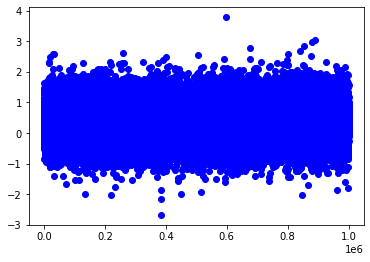

In [219]:
plt.plot(gibbs_sample[:,0],'bo')
plt.show()